# Movie Genre and Rating Analysis

Tutorial by Afe Addeh, Jorin Vincent, and Priscila Kozlov


## Introduction
For this project, we will combine our efforts to analyze the film industry across time. Our passion for movies has made us question the decrease in the production of some of our favorite movie genres in the last few years. We will try to find out if the following analysis can take us on the right path to discover some of the variables that are shaping the production trend in the film industry.

## Background Information
After the invention of the kinetoscope in 1891, film inventors have done their best to come up with new ways to innovate the film industry. Over time, the film industry has passed through different eras going from silent movies to 3D animations. However, in the last years, producers now seem to be focusing more on the production of some specific genres. A visit to a movie theater can confirm that there are some genres like romance and drama that are less common compared to horror, animation, and action movies.

Hollywood produces more than 700 movies on average every year. The main film distributors are Disney, Universal, Paramount, Warner Bros, MGM, and Sony. Hollywood is the most influential and oldest film industry, followed by India (Bollywood), China, United Kingdom, and Japan.While China has become the largest box office territory, the US still has the largest box office from national films and still dominates The Oscars. In terms of productions, India is on top of the chart with almost 2000 films yearly.

We believe that the information above is crucial to narrow down our following analysis.


## Goal Of This Tutorial 

The goal of this tutorial is to provide a sample Data Science project that walks through the Data Science pipeline. The Data Science pipeline consists of five main stages: Data Collection, Data Processing, Exploratory Analysis, Hypothesis Testing, and Insight & Policy Decision. The order that a researcher proceeds through the fours stages is typically non-linear. This  is because as a researcher progress through the pipeline, they might find it necceasry to revisit stages that they have already done. For instance, while at the Hypothesis Testing stage you determined that in order to accuratly test your hypthesis you would need data in a certain format. Unfortunately, that data is in a different format. That would cause you to jump from the Hypothesis Testing and back to the Data Proccessing stage.

Each of the four stages will be futher explained below. However, here  will will go over a brief overview of what each stage consist of.  FINISH
* Data Collection: The action of gathering the data
* Data proccessing: The act of gathering the data that you are interested in analyazing and getting it in the required format for your system/platform
* Exploratory Analysis: Exploring the data and seeing what it looks like through various visuals
* Analysis, Hypothesis, Testing, and Machine Learning: Doing actaul analysis to test the idea gained in the exploratory stage
* Insight & Policy Decision: Communicating what has been done and why is important


At the end of this tutorial we hope that the reader better understands the phases that are implemented in Data Science projects, the background descisions and thought processes that are involved, and the fact that Data Science is really subjective - most of the time there is no one size fits all implementation/solution!

#### General data topics we were interested in analyzing in the project

* How does a movie's genre relate to its total gross/yearly gross? 
* Does the rating correlate to the movie gross?
* What about the number of box office releases for that movie?
* If the movie with year's highest movie gross is of a specific genre to are more movies of that genre produced?
* Is there any relation the genre of movies being released and the average movie gross for the genre?
* Is there any relation to genre and movie gross in general?



#### Things to keep in mind

* We, the group we created this tutorial, had a limited amount of time (roughly two weeks) that we could dedicate towards creating this tutorial. Due to that time constaint, and the large amount of effort getting/formatting the data took, a large potion of the tutorial will be dedicated to the Data Processing stage. 

* That time constraint also made it impossible to proccess all the data we have available at our fingertips - meaning in the data we recieved on the internet. We had to figure out a way to reduce the ammount of data we analyze so this tutorial would be done in time. As a result, we decided to only look at movie data from 1960's and onwards. We picked the 1960's because the 1960's is commonly agreed as the start of the Hollywood era. Since our general question center arount veiwer ratings and box office movie gross, its more likely that we would get more accurate data using the 1960 and later data.


## Gathering Data 


Publically available data containing movie/tv shows genres, rating, year gross, and year of release has already been collected by various reputable sources. We chose to investigate the IMDb Datasets (https://www.imdb.com/interfaces/), the BoxOfficeMojo Domestic Yearly Box Office dataset (https://www.boxofficemojo.com/year/?grossesOption=calendarGrosses), and the Wikipedia Top 100 Highest Grossing Domestic Box Office Films (https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_the_United_States_and_Canada#endnote_initial). These datasets have movie data going back all the way to 1874. The datasets also contain a wide range of potentially interesting data including: if it's an Adult movie, the production year, other (potentially foriegn) titles, names of directors, names of writers, etc. Another big positive to working with these datasets is that they are completely free to the public.  


Meanwhile with other media datasets, while they are just as extensive as IMDb, they would require a payment to get the complete dataset and not just a sample. For instance, another database we were considering using was The Numbers (https://www.the-numbers.com/box-office-records/domestic/all-movies/cumulative/all-time/2501). However, we realised to get the data we required we would have to pay $475.



## Data Processing


There are times when the data you recieve from the databases are not in the correct format or in a format that is difficult for the system to comprehend/handle. 

We will be using three datasets from IMDb. We must use three datasets instead of one since each dataset has relevant data to our question. However, there isn't one already made dataset that has all the information. As a result, we must upload all three databases, get the relevant infomation for each, and then combine the relavent data into one dataframe. 

As mentioned in the Gathering Data section, one positive to IMDb Datasaets is that we would have a large dataset to analyze and explore. However, it is also a negative. Because it is so large (a total of 710 MB!!), it is impossible for most laptops/computers to process the data all at once. As a result, it must be condensed to only contain data we think may be relavent in future analysis and must be proccessed in chunks. 

NOTE: This is a common problem in data science and would most likely need to be addressed when you do data science analysis in the future.


#### Getting the IMDb DataFrames

In [1]:
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines 
from matplotlib.pyplot import figure 
from collections import defaultdict
from statsmodels.formula.api import ols
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
#dictates the number of rows each data frame should have
chunksize = 100000

# the list that contains all the dataframes
list_of_dataframes = []


# Seperates title.basics.tsv into chunks with 100000 rows with the header of row 0.
#The columns of the dataframes would be tconst, originalTitle, startYear (publication year), 
#and genres data. each chunck is added to list_of_dataframes
for df in pd.read_csv("title.basics.tsv", sep='\t', chunksize=chunksize, 
                       header=0, usecols=['tconst', 'primaryTitle', 'genres', 'startYear', 'endYear']):
      list_of_dataframes.append(df)
        
#concats all the chunck dataframes to make one combined        
data1 = pd.concat(list_of_dataframes)

C:\Users\Crunchwrap Supreme\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data1.head()

,tconst,primaryTitle,startYear,endYear,genres
0,tt0000001,Carmencita,1894,\N,"Documentary,Short"
1,tt0000002,Le clown et ses chiens,1892,\N,"Animation,Short"
2,tt0000003,Pauvre Pierrot,1892,\N,"Animation,Comedy,Romance"
3,tt0000004,Un bon bock,1892,\N,"Animation,Short"
4,tt0000005,Blacksmith Scene,1893,\N,"Comedy,Short"


Each production instance/row has the following features/attributes: 
* tconst  – IMDb's alphanumeric unique identifier of the movie title
* primaryTitle  – the more popular movie title / the movietitle used by the filmmakers on promotional     materials at the point of release
* startYear  – represents the release year of a movie title.  In the case of TV Series, it is the series start year
* endYear  – TV Series end year. ‘\N’ for all other title types
* genres  – includes up to three genres associated with the title

All of them are object types.



In [4]:
#makes a dataframe from the data in the title.ratings.tsv database
#averageRating is the average IMDb rating , numVotes is the number of IMDd
#votes the movie recieved
data2= pd.read_csv("title.ratings.tsv", sep='\t')
data2.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1725
1,tt0000002,6.0,211
2,tt0000003,6.5,1487
3,tt0000004,6.1,125
4,tt0000005,6.2,2288


Each movie instance/row has the following features/attributes: 
* tconst  – IMDb's alphanumeric unique identifier of the movie title (same as dataframe above)
* averageRating  – weighted average of all the individual user ratings
* numVotes  – number of votes the title has received

All of them are object types.


In [5]:
#makes a dataframe from a portion of data in the data.tsv database
#it only collects the columns of titleID and region and puts that in a dataframe
data3= pd.read_csv("data.tsv", sep='\t', usecols=['titleId', 'region'])

# gets all the rows with the region being US 
data3 = data3[data3['region'] == 'US']

#removes the region column since it is no longer needed
data3=data3.drop(columns=['region'])

data3.head()

,titleId
5,tt0000001
14,tt0000002
35,tt0000005
39,tt0000005
40,tt0000005


Each movie instance/row has the following features/attributes: 
* titleID (object)  – IMDb's alphanumeric unique identifier of the movie title (same as dataframe above)


#### Combining the IMDb DataFrames 

When combining DataFrames, or any type of table, you will have to decide how the join should occur and how that should relate to missing data. Let's say that you have two tables/DataFrames. Table 1 has Data1 values and Table 2 has Data2 value. We will be discussing three main ways to approach merging the two data sets: 

* Inner Join: Only the rows that are shared acorrding to your defintion (ie. column value, index, etc) between the two tables are put into the new table. That means that there will be no missing data in the final DataFrame/Table since each row will have both Data1 and Data2 values. 

* Left Join: It provides the same results as Inner Join but it would also include rows that have Data1 values (when considering Table 1 as the left table-which can also be described as the base table) but no Data 2 values. In this case there will be missing data. 

* Right Join: It provides the same results as Inner Join but it would also include rows that have Data2 values (when considering Table 2 as the right table-the table that is being merged in) but no Data1 values. In this case there will be missing data. 

Below, you will see that we choose to inner join when merging the IMDb Dataframes. That is because for our research we only wanted the movie data that has all the data since we will explore how those data relate to each other. If a value was missing then using that missing data can lead to future compuutaion errors and confusion. 

NOTE: There is definitive join that should always be used. You must consider what you are trying to achieve with that data and the releavance of the missing data when determining which join to use.

In [6]:
#merges (through inner join) data1 and data2 based on the tconst values
#and makes it a dataframe named partial_data_table
partial_table= pd.merge(data1, data2, on='tconst')
partial_table.head()

,tconst,primaryTitle,startYear,endYear,genres,averageRating,numVotes
0,tt0000001,Carmencita,1894,\N,"Documentary,Short",5.7,1725
1,tt0000002,Le clown et ses chiens,1892,\N,"Animation,Short",6.0,211
2,tt0000003,Pauvre Pierrot,1892,\N,"Animation,Comedy,Romance",6.5,1487
3,tt0000004,Un bon bock,1892,\N,"Animation,Short",6.1,125
4,tt0000005,Blacksmith Scene,1893,\N,"Comedy,Short",6.2,2288


In [7]:
#filters partial_data_table based on weither the row's title constant can be found in data3
#Full_table has all the information (title, genres, averateRating, etc) for only the US productions
full_table=partial_table.loc[partial_table["tconst"].isin(data3["titleId"])] 
full_table.head()

,tconst,primaryTitle,startYear,endYear,genres,averageRating,numVotes
0,tt0000001,Carmencita,1894,\N,"Documentary,Short",5.7,1725
1,tt0000002,Le clown et ses chiens,1892,\N,"Animation,Short",6.0,211
4,tt0000005,Blacksmith Scene,1893,\N,"Comedy,Short",6.2,2288
5,tt0000006,Chinese Opium Den,1894,\N,Short,5.1,128
6,tt0000007,Corbett and Courtney Before the Kinetograph,1894,\N,"Short,Sport",5.4,699


#### Getting the BoxOfficeMojo DataFrame

One nice part about the IMDb data is that it has an API that makes retreiving the movie data and converting it to the correct format (for this tutorial that would be Pandas DataFrames) very straight forward. As you see above, we can download the file directly and then read it in to a Datafreame. However, not all website has that capability. For instance, the BoxOfficeMojo Domestic Yearly Box Office dataset does not API. As a result, we will have to use a technique called Data Scraping. 

DataScraping is when we must get the all contents of the website, select the sections that we want to put into a DataFrame, clean up that section if needed so it fits the format of a Datframe, and then we can convert it to a DataFrame. In this instance, the desired section would be the the table containing the Domestic Yearly Box Office dataset. 

In [8]:
source = rq.get('https://www.boxofficemojo.com/year/?grossesOption=calendarGrosses&sort=year&ref_=bo_yl__resort#table')

#gets the structure out of the html text (in form of string)
soup = BeautifulSoup(source.text)

In [9]:
#gets the first instance of a table in the BeautifulSoup type since noticed in prettify
#that the first table has the desired data
table = soup.find('table')

#panda reads the table (which is concerted into a string first) and displays the 
#first, and only, table in the dataframe.
movie_gross= pd.read_html(table.prettify())[0]

#renames two of the columns to more appropriate names
movie_gross=movie_gross.rename(columns={"Average": "AverageGrossPerRelease", 
                                     "Releases":"NumberOfReleases" })

#removes the %± LY column since we do not care aout the gross change per year
movie_gross=movie_gross.drop(columns=["%± LY"])
movie_gross.head()

,Year,Total Gross,NumberOfReleases,AverageGrossPerRelease,#1 Release
0,2021,"$1,411,803,792",230,"$6,138,277",F9: The Fast Saga
1,2020,"$2,103,085,767",455,"$4,622,166",Bad Boys for Life
2,2019,"$11,320,873,671",911,"$12,426,864",Avengers: Endgame
3,2018,"$11,889,341,443",993,"$11,973,153",Black Panther
4,2017,"$11,072,815,067",852,"$12,996,261",Star Wars: Episode VIII - The Last Jedi


Each movie instance/row has the following features/attributes: 
* Year (int)  – The year the movie was released
* Total Gross (object)  – The total gross that movie had that year
* NumberOfReleases (int)  – The number of movie theaters it was released in
* AverageGrossPerRelease (Object)  – The gross amount per release 
* #1 Release (Object)  – The name of the movie


#### Getting the Wikipedia DataFrame

Just as in the BoxOfficeMojo scraping, we repeat the process with Wikipedia. From the url to the page with the top 100 grossing domestic films we grab the html, search and find all tables, and pull the first table (the one we need). From there we rename the columns and re-index the rows.

In [10]:
source = rq.get('https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_the_United_States_and_Canada')
#gets the structure out of the html text (in form of string)
soup = BeautifulSoup(source.text)

In [11]:
#gets all instances of tables in the html
tables = soup.findAll('table')
#gets a list of dataframes made from all the tables in the html
dfs = pd.read_html(str(tables))
#grabs the first dataframe
df = dfs[0]
#renames the columns to something more readable and appropriate
df.columns = ['Rank', 'Title', 'Initial Gross', 'Unadjusted Lifetime Gross', 'Adjusted Lifetime Gross', 'Year']
#re-indexes the rows to match the ranks
df.index = range(1, 101)

df.head()

,Rank,Title,Initial Gross,Unadjusted Lifetime Gross,Adjusted Lifetime Gross,Year
1,1,Star Wars: The Force Awakens,"$936,662,225","$936,662,225","$1,022,662,098",2015
2,2,Avengers: Endgame,"$858,373,000","$858,373,000","$868,875,026",2019
3,3,Avatar,"$749,766,139","$760,507,625","$917,188,852",2009
4,4,Black Panther,"$700,059,566","$700,059,566","$721,489,961",2018
5,5,Avengers: Infinity War,"$678,815,482","$678,815,482","$699,595,548",2018


Each movie instance/row has the following features/attributes: 
* Rank (int)  – The rank out of 100 for highest unadjusted lifetime gross
* Title (Object)  – The name of the movie
* Initial Gross (Object)  – The gross amount made on first release
* Unadjusted Lifetime Gross (Object)  – The lifetime gross unadjusted to inflation
* Adjusted Lifetime Gross (Object)  – The lifetime gross adjusted to inflation
* Year (int)  – The year the movie was initially released


#### Processing unavailable fata in the DataFrames
It is very important that the data within the dataframe that is unavailable is categorized properly and uniformly.

There is no uniform rule on how different databases will represent missing data. Some databases put '-', others write 'NONE', or an empty string. There is an infinite amount of possibilities that databases could use. However, what is important from the data science perspective is how will Pandas interpret those values and having a consensus within the community.

In order for Pandas (and the community) to understand that a value is missing, that cell must have one of these values:

numpy.NaN (numpy): A number value is not available in a number column
numpy.nan (numpy): Same as the above (either one could be use for a missing number)
pd.NaT (pandas): A time value in a time column is not available
pd.NA (pandas): A general type of value is Not Available
None (python): similar to pd.NA
Note: Data has an underlying meaning. If something was meant to be s number but turned out not to be, that could be potentially different from it not being available.

According to the IMBd website, their databases use ‘\N’ to denote that a particular field is missing or null for that title/name. These must be converted to an appropriate value from the list above. When looking over the BoxOfficeMojo data manually we can see that there is is no missing data. However, it is always best to do checks just in incase.

In [12]:
#replaces all instance of missing values in the full_table 
#dataframe as replace it with a pd Null or numpy Null value
full_table['primaryTitle'].replace({'\\N': pd.NA}, inplace=True)
full_table['genres'].replace({'\\N': pd.NA}, inplace=True)
full_table['startYear'].replace({'\\N': pd.NaT}, inplace=True) 
full_table['endYear'].replace({'\\N': pd.NaT}, inplace=True)
full_table['averageRating'].replace({'\\N':np.NaN}, inplace=True)
full_table['numVotes'].replace({'\\N':np.NaN}, inplace=True)

In [13]:
#makes a copy of the full_table data for further top 100 manipulation
top_100 = full_table

In [14]:
#gets the rows where the endYear is a null value
full_table=full_table[full_table['endYear'].isna()]

#removes the endYear column since it is no longer needed
full_table=full_table.drop(columns=['endYear'])

#renames two of the columns to more appropriate names
full_table=full_table.rename(columns={"primaryTitle": "title", "startYear": "releaseYear"})

full_table.head()

,tconst,title,releaseYear,genres,averageRating,numVotes
0,tt0000001,Carmencita,1894,"Documentary,Short",5.7,1725
1,tt0000002,Le clown et ses chiens,1892,"Animation,Short",6.0,211
4,tt0000005,Blacksmith Scene,1893,"Comedy,Short",6.2,2288
5,tt0000006,Chinese Opium Den,1894,Short,5.1,128
6,tt0000007,Corbett and Courtney Before the Kinetograph,1894,"Short,Sport",5.4,699


In [15]:
#removes the endYear column since it is not needed
top_100 = top_100.drop(columns=['endYear'])

#renames columns to more appropriate names
top_100.columns = ['tconst', 'Title', 'Year', 'Genres', 'Average Rating', 'Number of Votes']

top_100.head()

,tconst,Title,Year,Genres,Average Rating,Number of Votes
0,tt0000001,Carmencita,1894,"Documentary,Short",5.7,1725
1,tt0000002,Le clown et ses chiens,1892,"Animation,Short",6.0,211
4,tt0000005,Blacksmith Scene,1893,"Comedy,Short",6.2,2288
5,tt0000006,Chinese Opium Den,1894,Short,5.1,128
6,tt0000007,Corbett and Courtney Before the Kinetograph,1894,"Short,Sport",5.4,699


We are removing the rows that don't have a null value in the endYear column because, as noted on the IMDb api website, when an endYear is provided that means it is a tv series, not a movie. Since we only care about movies, the information about TV series' is irrevalant and should be deleted to prevent possible future errors. For the top 100 dataset, we don't have to worry about TV series' being included or not since we will match out the top 100 movies regardless of other entries.

#### Converting the types of the columns

In order to do the graphing and analysis, it is important that the data is in the 'correct' type. By 'correct', we mean a type that makes sense according to what the data represents and according the expectation of other Data Scientist/evaluators/contributers to your work. 

Now what is a type in Data Science? It is definitely not the same thing as a type (int, float, string, etc) in general computer science. A type in Data Science is divided into 2 main categories (Categorical and Numeric) and 4 sub categories:

* Nominal (Categorical): This is abstract categorical data and is a finite set (ie. 5 soda flavors, marital status). There is no way to compare between Nominal data type and thus there is no order to the set (you can't say scientifically that one is 'better'/'greater' than the other). One can say that you can order anything and that is true! But we define if we can order it or not depending on if the ordering would have meaning where how/why the data is used is being considered. Ordering nominal data would have no meaning.

* Ordinal (Categorical): It is like Nominal but now the items in the set can be put in sometype of meaningful order. One example would the days of of one week. Since the duration of the data is during one week we can say the the data of Tuesday is before Wednesday, Saturday is after Friday and so on. But if was on a span of multiple weeks then that would not be possible. Another example would be rating a teacher boring, neutral, or exciting. Although now there is an order to the data, there is no mathmatical way of measuring the distance bewteeen the categories.

* Interval (Numeric): Now the data is like Oridinal since it has ordering but it also has a way of measuring distance between the ctaegories. Two examples are grade levels or temperature. However, this data doesn't make sense in terms of fractions/ratios (imagine being in grade 3/grade 5!).

* Ratio (Numeric): It is similar to Interval data but now ratios between the values are meaningful and there is a meaningful zero value. You can think of it as categorical data with order, distance, and ratios. Some examples would be tear ratings in stars and measurements in miles. 
 
Using those descriptions you will be able to determine which type (now using the general Computer Science definition) the data should be. Originally, most of the data we got was in the type Object - which is best for categorial data. However, by looking at the data, we knew that select columns should be Ratio or Interval data types instead (int, floats, long, etc). If we kept them as objects, that would have lead to major confusion later on in the pipeline.


In [16]:
#converts the releaseYear, numVotes to int types and  averageRating to float type
full_table["releaseYear"] = full_table["releaseYear"].astype('int64')
full_table["averageRating"] = full_table["averageRating"].astype(float)
full_table["numVotes"] = full_table["numVotes"].astype(int)
top_100['Year'] = top_100['Year'].astype('int64')
top_100['Average Rating'] = top_100['Average Rating'].astype(float)
top_100['Number of Votes'] = top_100['Number of Votes'].astype(int)

#sorts the table in descending order occrding to the release Year
full_table = full_table.sort_values(by=['releaseYear'], ascending=False)
top_100 = top_100.sort_values(by=['Year'], ascending=False)

full_table.head()

,tconst,title,releaseYear,genres,averageRating,numVotes
450183,tt10156586,Snow Black,2021,Action,2.3,70
612720,tt13837022,Hot Money,2021,Documentary,5.8,120
612832,tt13839188,Designed with Love,2021,Romance,6.1,180
612852,tt13839612,Strictly for the Streets: Vol 1.,2021,Drama,9.4,110
612870,tt13840726,Wendy Williams: What a Mess!,2021,"Biography,Documentary",6.4,166


Each column now has the following type:
* tconst  – object 
* title  – object   
* releaseYear  – int
* genres  – object
* averageRating  – float
* numVotes  – int

In [17]:
#converts the Year, Total Gross, NumberOfReleases, and AverageGrossPerRelease to int types
movie_gross["NumberOfReleases"]= movie_gross["NumberOfReleases"].astype(int)
movie_gross["Year"]= movie_gross["Year"].astype(int)
movie_gross["Total Gross"]= [int(x[1:].replace(",", "")) if pd.notnull(x) else x for x in movie_gross["Total Gross"]]
movie_gross["AverageGrossPerRelease"]= [int(x[1:].replace(",", "")) if pd.notnull(x) else x for x in movie_gross["AverageGrossPerRelease"]]

#sorts the table in descending order occrding to the Year
movie_gross = movie_gross.sort_values(by=['Year'], ascending=False)
movie_gross.head()

,Year,Total Gross,NumberOfReleases,AverageGrossPerRelease,#1 Release
0,2021,1411803792,230,6138277,F9: The Fast Saga
1,2020,2103085767,455,4622166,Bad Boys for Life
2,2019,11320873671,911,12426864,Avengers: Endgame
3,2018,11889341443,993,11973153,Black Panther
4,2017,11072815067,852,12996261,Star Wars: Episode VIII - The Last Jedi


Each column now has the following type:
* Year  – int
* Total Gross  – int  
* NumberOfReleases  – int
* AverageGrossPerRelease  – int
* #1 Release  – Object

#### Reducing the data to 1960 and later 

As stated earlier, it was neccesary for us to restrict the data to 1960 and later due to time constrants. The top 100 table is restricted further due to no movies made before 1977 belonging to the dataset. If given more time then it might have been benefical to explore the entire data set or even compare between the movie eras. 

In [18]:
#removes the rows from both dataframes that have a releaseYear/Year value later then 1960
full_table = full_table[full_table["releaseYear"] >1959]
movie_gross = movie_gross[movie_gross["Year"] >1959]
top_100 = top_100[top_100['Year'] > 1976]

#### Further top 100 manipulation

In order to best utilize all the data available to us, we needed to match and pull the information of the top 100 movies from our dataset of all movies.

In [19]:
#sort the values by tconst to consistently match the same movie (there are duplicates with different ids in the set)
top_100 = top_100.sort_values(by=['tconst'], ascending=False)
#make a temp dataframe to store the matched movies
temp = pd.DataFrame(columns=['tconst', 'Title', 'Year', 'Genres', 'Average Rating', 'Number of Votes'])
#find and store the top 100 movies from the dataset
for n, r in df.iterrows():
    t = top_100.loc[(top_100['Title'] == r['Title']) & (top_100['Year'] == r['Year'])]
    temp = temp.append(t)

#remove duplicate entries
temp = temp.sort_values(by=['Number of Votes'], ascending=False)
temp.drop_duplicates(subset=['Title'], keep='first', inplace=True)

In the large dataset of all the movies from 1977 onward, there are many duplicate entries. The best way we found to sort out the duplicates was looking at the number of votes cast for the movie. A top 100 grossing film wouldn't have a couple hundred votes but rather several thousand. By sorting the data by the number of votes and removing all but the first duplicate, we can ensure that we are keeping the right entry.

This same strategy is employed below. Because the titles of some movies don't match between the two datasets, we had to manually find the movies that were missing from the top 100. In our case, 4 movies matched the title but had far too few votes to have been the main/real entry from the imdb dataset. In these cases, we removed the entries from the table and found the correct entry before adding it back to the table.

In [20]:
#removes the four "false" entries
temp = temp.drop(temp.loc[temp['tconst'] == 'tt1043740'].index)
temp = temp.drop(temp.loc[temp['tconst'] == 'tt2301123'].index)
temp = temp.drop(temp.loc[temp['tconst'] == 'tt6495412'].index)
temp = temp.drop(temp.loc[temp['tconst'] == 'tt7767902'].index)

#adds the "real" movie entries and any missing films that weren't matched
l = ['tt0926084', 'tt1201607', 'tt0449088', 'tt0325980', 'tt0086190', 'tt6320628', 'tt0076759', 'tt0120915', 'tt0121765', 'tt0121766', 'tt2488496', 'tt2527336', 'tt2527338', 'tt0080684', 'tt1951265', 'tt6105098', 'tt1673434']
for e in l:
    t = top_100.loc[top_100['tconst'] == e]
    temp = temp.append(t)

After making sure all 100 films (that matched the Wikipedia dataset) were included in the table, we corrected the titles of a few films to match the Wikipedia dataset exactly (when sorting by 'Title', the movies would appear in a different order due to the differences in name).

In [21]:
temp.at[temp.loc[temp['tconst'] == 'tt0449088'].index, 'Title'] = "Pirates of the Caribbean: At World's End"
temp.at[temp.loc[temp['tconst'] == 'tt0325980'].index, 'Title'] = "Pirates of the Caribbean: The Curse of the Black Pearl"
temp.at[temp.loc[temp['tconst'] == 'tt0086190'].index, 'Title'] = "Return of the Jedi"
temp.at[temp.loc[temp['tconst'] == 'tt2488496'].index, 'Title'] = "Star Wars: The Force Awakens"
temp.at[temp.loc[temp['tconst'] == 'tt2527336'].index, 'Title'] = "Star Wars: The Last Jedi"
temp.at[temp.loc[temp['tconst'] == 'tt2527338'].index, 'Title'] = "Star Wars: The Rise of Skywalker"
temp.at[temp.loc[temp['tconst'] == 'tt0076759'].index, 'Title'] = "Star Wars"
temp.at[temp.loc[temp['tconst'] == 'tt0080684'].index, 'Title'] = "The Empire Strikes Back"

The next step in this process was to add the additional data to the Wikipedia table. We chose not to use join in this instance because we only needed 3 of the columns from the imdb dataset and there were still small differences in the movie titles due to different uses of punctuation.

In [22]:
#sort both tables by 'Title'
temp = temp.sort_values(by=['Title'])
df = df.sort_values(by=['Title'])
#adds the ratings, number of votes, and genres to the wikipedia dataset
df['Rating'] = temp['Average Rating'].values
df['Number of Votes'] = temp['Number of Votes'].values
df['Genres'] = temp['Genres'].values
#sorts the wikipedia dataset by its original rank
df = df.sort_values(by=['Rank'])
df.head()

,Rank,Title,Initial Gross,Unadjusted Lifetime Gross,Adjusted Lifetime Gross,Year,Rating,Number of Votes,Genres
1,1,Star Wars: The Force Awakens,"$936,662,225","$936,662,225","$1,022,662,098",2015,7.8,875947,"Action,Adventure,Sci-Fi"
2,2,Avengers: Endgame,"$858,373,000","$858,373,000","$868,875,026",2019,8.4,901486,"Action,Adventure,Drama"
3,3,Avatar,"$749,766,139","$760,507,625","$917,188,852",2009,7.8,1143547,"Action,Adventure,Fantasy"
4,4,Black Panther,"$700,059,566","$700,059,566","$721,489,961",2018,7.3,660394,"Action,Adventure,Sci-Fi"
5,5,Avengers: Infinity War,"$678,815,482","$678,815,482","$699,595,548",2018,8.4,896117,"Action,Adventure,Sci-Fi"


The final step in preparing this data for analysis was removing the punctutation and symbols from the lifetime grosses for easy use in plotting.

In [23]:
#removes commas and dollar signs from lifetime gross entries
df["Unadjusted Lifetime Gross"]= [int(x[1:].replace(",", "")) if pd.notnull(x) else x for x in df["Unadjusted Lifetime Gross"]]
df["Adjusted Lifetime Gross"]= [int(x[1:].replace(",", "")) if pd.notnull(x) else x for x in df["Adjusted Lifetime Gross"]]

## Exploratory Anaylsis and Data Visualization 

As mentioned earlier, the Exploratory Analysis and Data Visualization phase is centered around exploring the data, seeing what looks interesting, and getting a better understanding of what should be further looked into. This also allows the Data Scientist to try and see if there are any patterns within the data. In order to do that, this phase ususally involves a lot of visualizations since the human brain is very good at detecting patterns. There should not be any conclusions within this stage, only seeing what should be explored further on in the pipeline. 

Below you will see some of the exploratory paths we took with the movie data when in this stage of the pipeline.

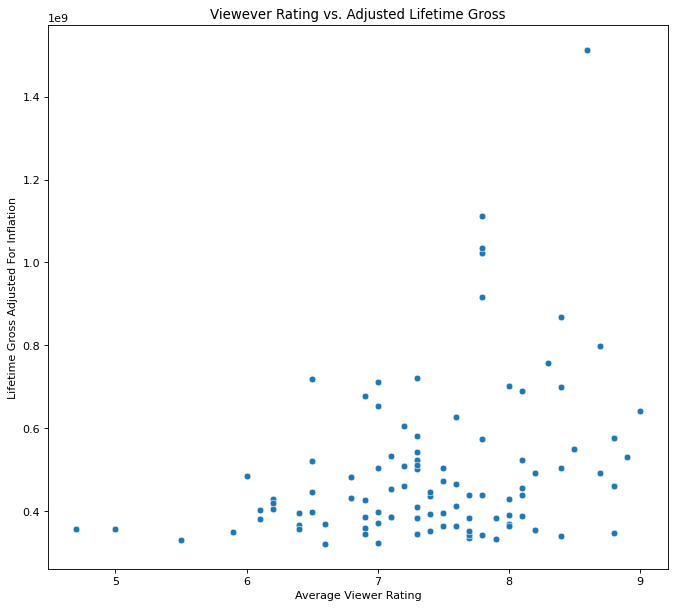

In [24]:
plt.rcParams.update({'font.size': 10}) #sets size of labels/title 
figure(figsize=(10, 9), dpi=80) #sets the figure/graph size

#creates scatterplot with ratings as x values and adjusted lifetime gross as y values 
ax=sns.scatterplot(x='Rating', y='Adjusted Lifetime Gross', data=df) 

plt.xlabel('Average Viewer Rating') #x label
plt.ylabel('Lifetime Gross Adjusted For Inflation') #y label
plt.title("Viewever Rating vs. Adjusted Lifetime Gross") #makes title

plt.show()

When trying to compare the lifetime gross of a film to its rating, we don't seem to find a correlation. We had thought that maybe movies with a higher earning also earned a higher rating, but that seems to be untrue. There are too many films with similar earnings that got widely different ratings.

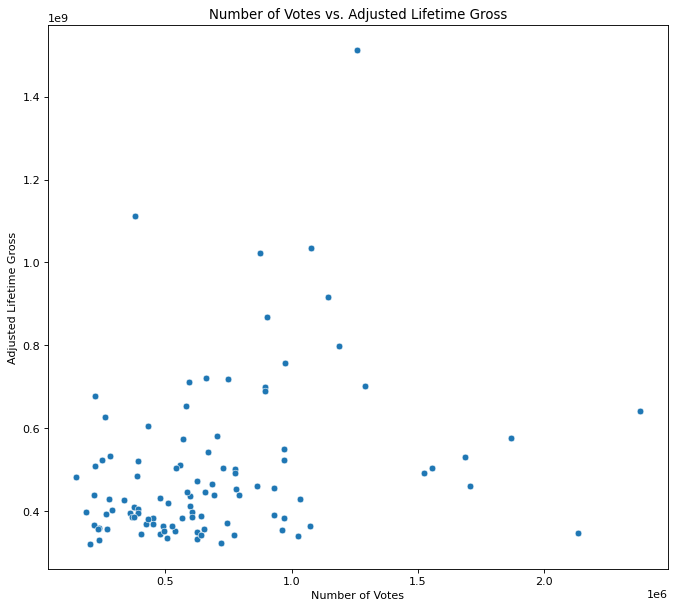

In [25]:
plt.rcParams.update({'font.size': 10}) #sets size of labels/title 
figure(figsize=(10, 9), dpi=80) #sets the figure/graph size

#creates scatterplot with number of votes as x values and adjusted lifetime gross as y values 
ax=sns.scatterplot(x='Number of Votes', y='Adjusted Lifetime Gross', data=df) 

plt.xlabel('Number of Votes') #x label
plt.ylabel('Adjusted Lifetime Gross') #y label
plt.title("Number of Votes vs. Adjusted Lifetime Gross") #makes title

plt.show()

Following a similar idea as above, we compared the lifetime gross of a film to the number of votes towards its rating it got. Much as the first graph, we find there's no correlation between the two. There have been movies earning on the lower end with thousand upon thousands of votes while movies with similar earnings receive far fewer votes.

This path seems to be a dead end. But out of pure curiosity, lets compare the rating a movie gets and the number of votes it received.

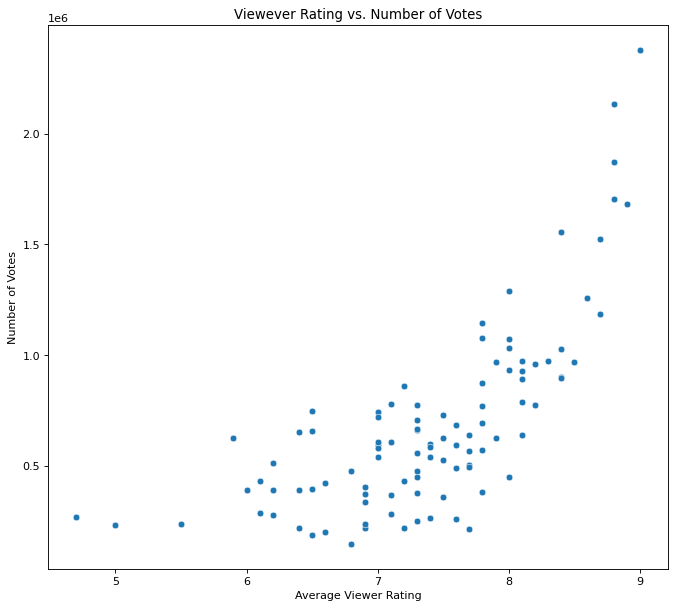

In [26]:
plt.rcParams.update({'font.size': 10}) #sets size of labels/title 
figure(figsize=(10, 9), dpi=80) #sets the figure/graph size

#creates scatterplot with ratings as x values and number of votes as y values 
ax=sns.scatterplot(x='Rating', y='Number of Votes', data=df) 

plt.xlabel('Average Viewer Rating') #x label
plt.ylabel('Number of Votes') #y label
plt.title("Viewever Rating vs. Number of Votes") #makes title

plt.show()

A correlation! As you can see, there seems to be a trend bewteen the number of votes a movie received and the average rating it earned. This doesn't necessarily mean that getting more votes gets a movie a higher rating. The average rating is the average of every vote so if a movie with one million plus votes has a high rating, a large quantity of those people rated that movie fairly highly. This leads us to beleive that the quality of a movie incentivizes people to leave reviews and rate the movie. If a movie was incredibly good, people would want to vote for the movie and encourage others to see it (thereby leaving a good rating). The opposite is true as well, with those seeing bad films probably choosing not to spend any more of their time on the movie by voting for it (or rather against it). As we saw in the previous graphs, the amount of money a movie made doesn't guarantee a high rating; plenty of bad movies made lots of money. But it seems that the good movies motivate people to leave a good review and recommend it to others while bad movies discourage that same tendency.

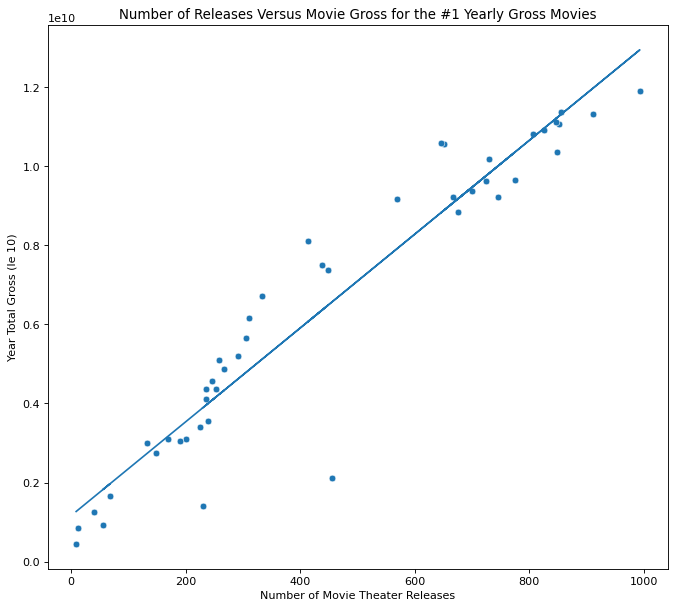

In [27]:
plt.rcParams.update({'font.size': 10}) #sets size of labels/title 
figure(figsize=(10, 9), dpi=80) #sets the figure/graph size

#creates scatterplot with number of releases as x values and total gross as y values 
ax=sns.scatterplot(x='NumberOfReleases', y='Total Gross', data=movie_gross) 

plt.xlabel('Number of Movie Theater Releases') #x label
plt.ylabel('Year Total Gross (le 10)')#y label
plt.title("Number of Releases Versus Movie Gross for the #1 Yearly Gross Movies") #makes title

# uses the x and y columns....
x= movie_gross['NumberOfReleases']
y= movie_gross['Total Gross']

# ...to get the m and b for the line of best fit (degree of 1)
#plots that line on the graph
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x+b)

plt.show()

Here we are seeing if the number of theater releases have possible relationship with the Year Total Gross of that movie. Our hypothesis was that there would be a strong trend so that the higher the number of box office releases the higher the gross. In fact, we thought there would be a somewhat correlation/linear relationship between those two variables. This hypothesis ended up being supported by the data.

Lets take a look at the total amount of film productions by genre across time.
Approaching this analysis is quite challenging because the genre column in our dataframe does not contain a single genre value.
Most movies listed in the data are listed under at least two different genres. Therefore, we have decided to count the movies for as many genres they are listed for. 

We have created a dictionary to count the number of movies by genre and removed the least common genres. This dictionary  has been used to plot the following graph.

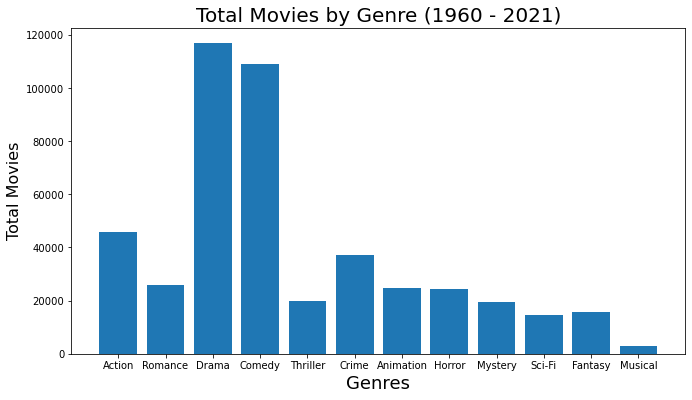

In [28]:
#Creating a genres dictionary
genre_dict = defaultdict(int)

#Counter function
def get_genre (data):
  try: 
    curr_genres = data.split(',')
    for genre in curr_genres:
      genre_dict[genre] += 1
  except AttributeError: 
    pass
       
  return data

full_table['genres'].apply(get_genre)

#Removing undesired genres
del genre_dict['War'],genre_dict['Short'],genre_dict['Biography']
del genre_dict['History'],genre_dict['Game-Show'],genre_dict['Sport']
del genre_dict['Reality-TV'],genre_dict['News'],genre_dict['Talk-Show']
del genre_dict['Documentary'],genre_dict['Music'],genre_dict['Adventure']
del genre_dict['Adult'],genre_dict['Family'],genre_dict['Western']

#Graph of total movies by genre (1960 - 2021)
g = list(genre_dict.keys())
vals = list(genre_dict.values())

plt.figure(figsize=(11,6))
plt.bar(range(len(genre_dict)),vals,tick_label=g)
plt.title('Total Movies by Genre (1960 - 2021)', fontsize=20)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Total Movies', fontsize=16)

plt.show()

We can observe that Comedy and Drama are the genres more listed in the data. This numbers do not support our hypothesis, in fact, it could disprove it. According to our hypothesis, genres like Horror, Action, and Animation are the most produced among all genres. Different genres have had their own golden years so we will narrow our analysis and subset the data to plot values from 2010 to 2021.

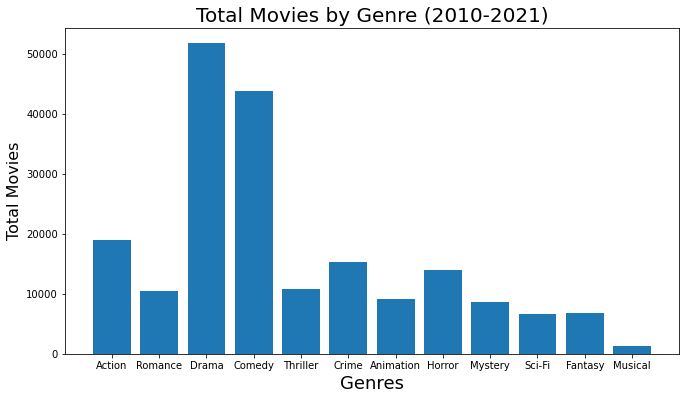

In [29]:
# new range table
cut_table = full_table[full_table["releaseYear"] >2009]

genre_dict2 = defaultdict(int)

def get_genre (data):
  try: 
    curr_genres = data.split(',')
    for genre in curr_genres:
      genre_dict2[genre] += 1
  except AttributeError: 
    pass
       
  return data

cut_table['genres'].apply(get_genre)

del genre_dict2['War'],genre_dict2['Short'],genre_dict2['Biography']
del genre_dict2['History'],genre_dict2['Game-Show'],genre_dict2['Sport']
del genre_dict2['Reality-TV'],genre_dict2['News'],genre_dict2['Talk-Show']
del genre_dict2['Documentary'],genre_dict2['Music'],genre_dict2['Adventure']
del genre_dict2['Adult'],genre_dict2['Family'],genre_dict2['Western']

#Graph of total movies (2010-2021)
g = list(genre_dict2.keys())
vals = list(genre_dict2.values())

plt.figure(figsize=(11,6))
plt.bar(range(len(genre_dict2)),vals,tick_label=g)
plt.title('Total Movies by Genre (2010-2021)', fontsize=20)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Total Movies', fontsize=16)

plt.show()

We can observe that the trend has not changed. Comedy and Drama continue being the genres more produced. Lets look at the last 5 years total film production.

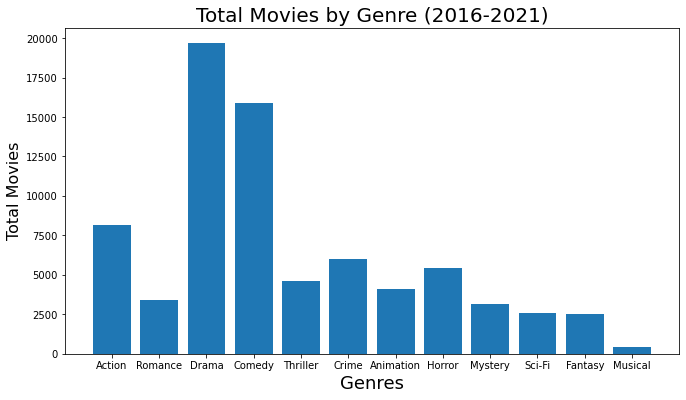

In [30]:
#new range table
cut_table2 = full_table[full_table["releaseYear"] >2016]


genre_dict3 = defaultdict(int)

def get_genre (data):
  try: 
    curr_genres = data.split(',')
    for genre in curr_genres:
      genre_dict3[genre] += 1
  except AttributeError: 
    pass
       
  return data

cut_table2['genres'].apply(get_genre)

del genre_dict3['War'],genre_dict3['Short'],genre_dict3['Biography']
del genre_dict3['History'],genre_dict3['Game-Show'],genre_dict3['Sport']
del genre_dict3['Reality-TV'],genre_dict3['News'],genre_dict3['Talk-Show']
del genre_dict3['Documentary'],genre_dict3['Music'],genre_dict3['Adventure']
del genre_dict3['Adult'],genre_dict3['Family'],genre_dict3['Western']

#Graph of total movies (2016-2021)
g = list(genre_dict3.keys())
vals = list(genre_dict3.values())

plt.figure(figsize=(11,6))
plt.bar(range(len(genre_dict3)),vals,tick_label=g)
plt.title('Total Movies by Genre (2016-2021)', fontsize=20)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Total Movies', fontsize=16)

plt.show()

Once again, the graph has not significately changed. We can observe how some genres start rising in number like Action and Crime but Drama and Comedy continue being the most produced genres. So far this part of our analysis has not helped us prove our hypothesis, we believe that Animation and Horror are the most produced film genres. We will try to find some answers by analysing the rating and number of votes. 

<AxesSubplot:>

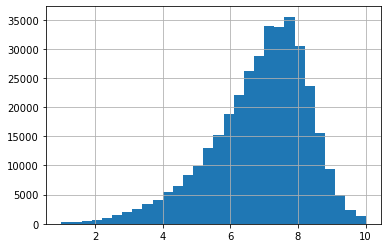

In [31]:
full_table['averageRating'].hist(bins=30)

As we can see, the average movie falls within the 7-8 range for its rating. Very few movies receive absolutely amazing ratings or absolutely terrible ratings. It's interesting to see that the curve falls much more steeply when aiming for higher ratings but the slope is much more gentle when headings towards lower ratings. From this we can surmise that it's harder to earn a perfect score and please enough people to get a rating that high while its much easier to earn a lower rating. Now, this might have been obvious as it takes a lot of time, effort, and money to make a hit movie (and there's no guarantee that it pays off; ie. no correlation between gross and rating) but it's much easier to understand now that we have a visual.

To visualize the genres in 0's and 1's, we made a table where we can numerically track genres. We achieved this by adding a column for each genre and have entries of 0 or 1 if the movie in the given row does or doesn't belonged to that genre.

In [32]:
period_table = full_table[full_table["releaseYear"] >2016]

period_table['Action'] = 0
period_table['Adventure'] = 0
period_table['Animation'] = 0
period_table['Comedy'] = 0
period_table['Drama'] = 0
period_table['Fantasy'] = 0
period_table['Horror'] = 0
period_table['Musical'] = 0
period_table['Romance'] = 0
period_table['Sci-Fi'] = 0
period_table['Thriller'] = 0

period_table.head()

,tconst,title,releaseYear,genres,averageRating,numVotes,Action,Adventure,Animation,Comedy,Drama,Fantasy,Horror,Musical,Romance,Sci-Fi,Thriller
450183,tt10156586,Snow Black,2021,Action,2.3,70,0,0,0,0,0,0,0,0,0,0,0
612720,tt13837022,Hot Money,2021,Documentary,5.8,120,0,0,0,0,0,0,0,0,0,0,0
612832,tt13839188,Designed with Love,2021,Romance,6.1,180,0,0,0,0,0,0,0,0,0,0,0
612852,tt13839612,Strictly for the Streets: Vol 1.,2021,Drama,9.4,110,0,0,0,0,0,0,0,0,0,0,0
612870,tt13840726,Wendy Williams: What a Mess!,2021,"Biography,Documentary",6.4,166,0,0,0,0,0,0,0,0,0,0,0


In [33]:
#removes rows with missing elements
period_table = period_table.dropna()

i = 0
#marks the genre columns that the movie belongs to
while i < len(period_table.index):
      curr_str = period_table.iat[i,3]
      if curr_str.find("Action") != -1:
        period_table.iat[i,6] = 1

      if curr_str.find("Adventure") != -1:
        period_table.iat[i,7] = 1

      if curr_str.find("Animation") != -1:
        period_table.iat[i,8] = 1

      if curr_str.find("Comedy") != -1:
        period_table.iat[i,9] = 1

      if curr_str.find("Drama") != -1:
        period_table.iat[i,10] = 1

      if curr_str.find("Fantasy") != -1:
        period_table.iat[i,11] = 1

      if curr_str.find("Horror") != -1:
        period_table.iat[i,12] = 1

      if curr_str.find("Musical") != -1:
        period_table.iat[i,13] = 1

      if curr_str.find("Romance") != -1:
        period_table.iat[i,14] = 1

      if curr_str.find("Sci-Fi") != -1:
        period_table.iat[i,15] = 1

      if curr_str.find("Thriller") != -1:
        period_table.iat[i,16] = 1
      
      i+=1

period_table.head()

,tconst,title,releaseYear,genres,averageRating,numVotes,Action,Adventure,Animation,Comedy,Drama,Fantasy,Horror,Musical,Romance,Sci-Fi,Thriller
450183,tt10156586,Snow Black,2021,Action,2.3,70,1,0,0,0,0,0,0,0,0,0,0
612720,tt13837022,Hot Money,2021,Documentary,5.8,120,0,0,0,0,0,0,0,0,0,0,0
612832,tt13839188,Designed with Love,2021,Romance,6.1,180,0,0,0,0,0,0,0,0,1,0,0
612852,tt13839612,Strictly for the Streets: Vol 1.,2021,Drama,9.4,110,0,0,0,0,1,0,0,0,0,0,0
612870,tt13840726,Wendy Williams: What a Mess!,2021,"Biography,Documentary",6.4,166,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#gets the top 7 genres
top_genres = period_table.iloc[:, 6:-1].sum().sort_values(ascending=False).head(7).index.values
top_genres

array(['Drama', 'Comedy', 'Action', 'Horror', 'Adventure', 'Animation',
       'Romance'], dtype=object)

<AxesSubplot:title={'center':'Top Genre Counts Over Time'}, xlabel='releaseYear'>

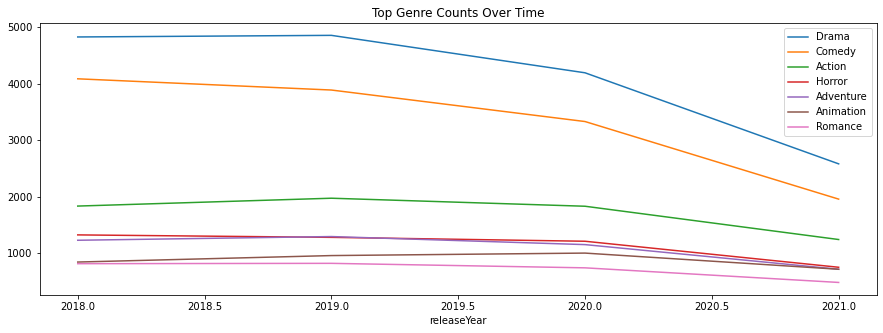

In [35]:
period_table["releaseYear"].dropna()

genre_table = period_table.iloc[:, 6:].groupby(period_table["releaseYear"]).sum().loc["1960":"2021", top_genres]
genre_table.rolling(2).mean().plot(figsize=(15,5),title="Top Genre Counts Over Time")

<AxesSubplot:title={'center':'Top Genre Votes Over Time'}, xlabel='numVotes'>

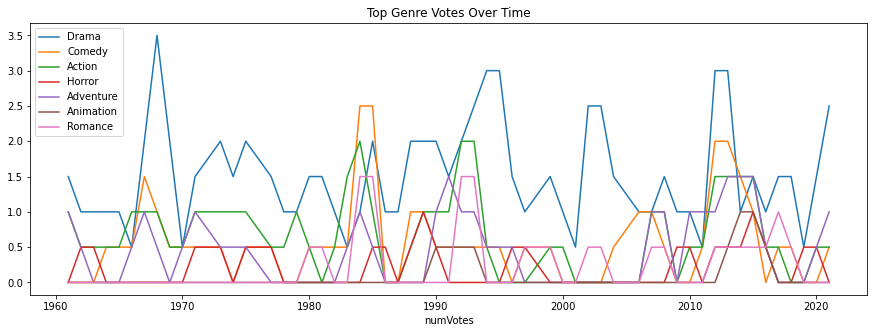

In [36]:
genre_table = period_table.iloc[:, 6:].groupby(period_table["numVotes"]).sum().loc["1960":"2021", top_genres]
genre_table.rolling(2).mean().plot(figsize=(15,5),title="Top Genre Votes Over Time")

This graph is focused only on data from 1960 to 2020. Drama movies are the most voted among genres followed by Comedy. This could mean that the most voted genres are the most acclaimed, therefore these are the most produced. The fact that people are more willing to vote for certain movie genres, proves that these genres are also more consumed than the rest. This is definitely related to the production trend seen in previous graphs. The production of Drama and Comedy could be related to the number of votes from viewers.

<AxesSubplot:title={'center':'Top Genre Votes Over Time (2016-2021)'}, xlabel='numVotes'>

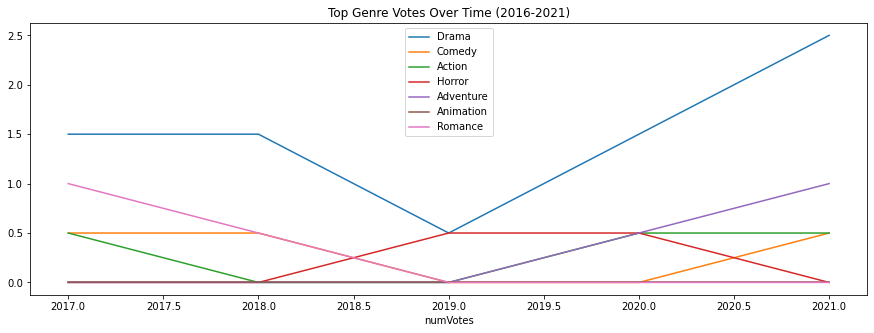

In [37]:
genre_table = period_table.iloc[:, 6:].groupby(period_table["numVotes"]).sum().loc["2016":"2021", top_genres]
genre_table.rolling(2).mean().plot(figsize=(15,5),title="Top Genre Votes Over Time (2016-2021)")

This graph gives a closer look at what's happening during the last five years and the correlation between votes and top genre.



## Hypothesis Analysis 

Now it is time to go to the Hypothesis Testing. This stage is where researchers form a hoypothesis based off the patterns and visuals seens in the Exploratory stage. That hypothesis is then tested to see if the data supports or doesn't support it. There are generally three stages to this phase:

1. Stating the null and (alternate) hypothesis- The alternate hypothesis proposes the thing you are trying to prove. The null hypothesis usually proposes that there is no difference or relation between the subject. However, you can think of it as the opposite of alternate hypothesis.

2. Perform an appropriate statistical test- There are many statistical tests and structures that can be used to see if the data supports or rejects the null hypothesis. Some of them are linear regression, gradient descent, and decision trees. We will be using linear regression in the project example. 

3. State whether the null hypothesis was rejected or if you failed to reject it.



#### What are our hypotheses?

Based on the trends we saw in the exploratory stage we are forming the following hypotheses:

* Null  - The number of votes a movie gets has no influence on the number of movies in that genre produced
* (Alternative) Hypothesis  - Are the most voted for genres the most acclaimed and, therefore, the most produced?



Throughout our analysis of thousands of movies and their various statistics, we attempted to make conclusions about data before fully seeing it and having our thoughts proven or disproven.

Originally, we attempted to find a correlation between movie gross and it's rating. We had thought movie that earned more money would end up with a higher rating. We found that there was no correlation between the two and that movies could be very poorly rated while making a lot of money. In the end, this hypothesis was flawed due to the lack of consideration of industries and franchises. At the end of the day, widely known and popular series' will gather a lotof traction, attention, and money regardless of the quality of the movie. We can see this in the highest grossing film of the domestic box office. Star Wars: The Force Awakens is the top lifetime earner for the domestic box office yet it only has a rating of 7.8, with many more movies rating higher than it.

We tried exploring a similar route with the number of votes a movie recieved increasing with the amount of money it made, but ended up with the same conclusion: no correlation. In fact, the only correlation we found between a movies gross and any other information we had available was the number of times it was released. As was expected, the more times a movie was released, the more money it made.


From there we shifted perspective towards genres, their popularity, their production, and their ratings. We went into this process expecting Action, Animation, and Horror movies to be the most produced genres. When looking at all the domestic films from 1960 onward, we quickly saw that we were wrong. Drama and Comedy were the most produced genres in the film industry during that time frame. While Action did fall in third place, it was much further behind the top two genres. When looking at smaller, more recent time frames, the results remained the same: Drama and Comedy are the most produced genres. With these new industry titans on our mind, we decided to see if there was a similar popularity that followed this mass production. As we thought, Drama movies had a much higher number of votes than all other genres. To us, this meant one of two things (or both): Drama movies are the most popular genre or they receive so many votes due to the number of movies being produced.

Now, despite seeing our original hypothesis on genres being wrong, lets do one last check. Instead of looking at all the movies made, we can look at just the top 100 grossing movies to see which genres sell the best.

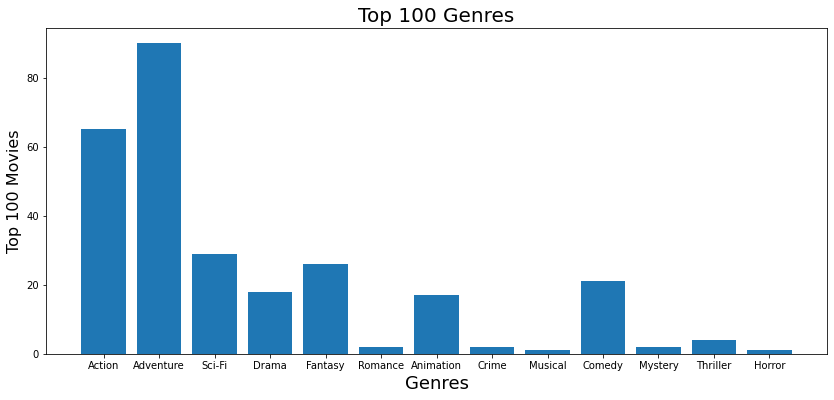

In [38]:
#Creating a genres dictionary
genre_dict = defaultdict(int)

#Counter function
def get_genre (data):
  try: 
    curr_genres = data.split(',')
    for genre in curr_genres:
      genre_dict[genre] += 1
  except AttributeError: 
    pass
       
  return data

df['Genres'].apply(get_genre)

#Removing undesired genres
del genre_dict['Family'], genre_dict['Biography']

#Graph of total movies by genre (1960 - 2021)
g = list(genre_dict.keys())
vals = list(genre_dict.values())

plt.figure(figsize=(14,6))
plt.bar(range(len(genre_dict)),vals,tick_label=g)
plt.title('Top 100 Genres', fontsize=20)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Top 100 Movies', fontsize=16)

plt.show()

From this graph we can see that Drama and Comedy no longer rise above the other genres! We can see that over 60% of the top 100 grossing domestic films are classified as action movies. Animation even falls on a similar level to Drama and Comedy, with Horror being one of the smallest groups. While our original hypothesis of Action, Animation, and Horror being the most produced films was incorrect, we can draw a different yet important conclusion: Action and Animation movies make up a sizeable portion of the top money making movies. There may not be as many Action and Animation movies (compared to Drama and Comedy) but they seem to make more money.

#### Did we reject or fail to reject the null hypothesis?

In order to test the null hypothesis we need to make a model of linear regression between the number of movies in a genre and the number of votes that genre receives.

In [39]:
tt = full_table
tt = tt.dropna()
#stores total votes for each genre
votes = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

i = 0
#gets counts of all votes for each genre
while i < len(tt.index):
      curr_str = tt.iat[i,3]
      if curr_str.find("Action") != -1:
        votes[0] = votes[0] + tt.iat[i,5]

      if curr_str.find("Romance") != -1:
        votes[1] = votes[1] + tt.iat[i,5]
        
      if curr_str.find("Drama") != -1:
        votes[2] = votes[2] + tt.iat[i,5]

      if curr_str.find("Comedy") != -1:
        votes[3] = votes[3] + tt.iat[i,5]

      if curr_str.find("Thriller") != -1:
        votes[4] = votes[4] + tt.iat[i,5]
        
      if curr_str.find("Animation") != -1:
        votes[5] = votes[5] + tt.iat[i,5]

      if curr_str.find("Adventure") != -1:
        votes[6] = votes[6] + tt.iat[i,5]

      if curr_str.find("Horror") != -1:
        votes[7] = votes[7] + tt.iat[i,5]

      if curr_str.find("Sci-Fi") != -1:
        votes[8] = votes[8] + tt.iat[i,5]

      if curr_str.find("Fantasy") != -1:
        votes[9] = votes[9] + tt.iat[i,5]

      if curr_str.find("Musical") != -1:
        votes[10] = votes[10] + tt.iat[i,5]
      
      i+=1


In [40]:
#Creating a genres dictionary
genre_dict = defaultdict(int)

#Counter function
def get_genre (data):
  try: 
    curr_genres = data.split(',')
    for genre in curr_genres:
      genre_dict[genre] += 1
  except AttributeError: 
    pass
       
  return data

full_table['genres'].apply(get_genre)

#Removing undesired genres
del genre_dict['War'],genre_dict['Short'],genre_dict['Biography']
del genre_dict['History'],genre_dict['Game-Show'],genre_dict['Sport']
del genre_dict['Reality-TV'],genre_dict['News'],genre_dict['Talk-Show']
del genre_dict['Documentary'],genre_dict['Music'],genre_dict['Mystery']
del genre_dict['Adult'],genre_dict['Family'],genre_dict['Western'],genre_dict['Crime']

#gets count of movies in each genre
vals = list(genre_dict.values())

After getting the count of every movie in each genre and the total number of votes for each genre we can plot the data and examine the regression.

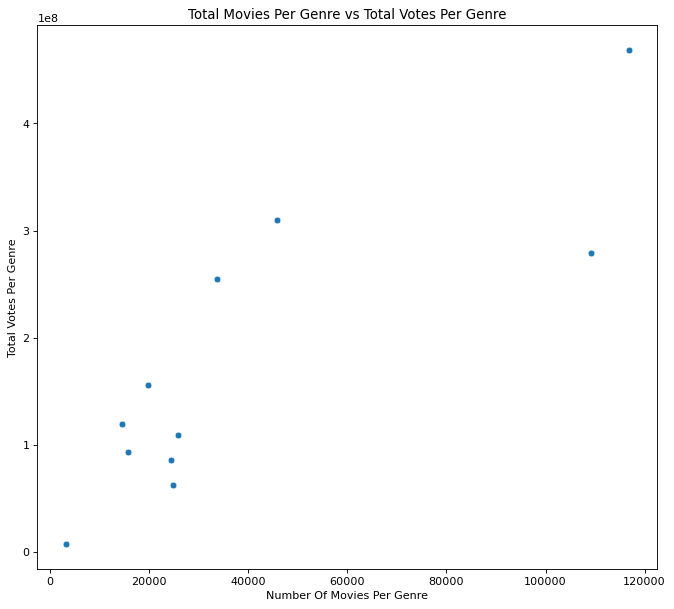

In [41]:
reg = pd.DataFrame(columns=['Movies', 'Votes'])
reg['Movies'] = vals
reg['Votes'] = votes

plt.rcParams.update({'font.size': 10}) #sets size of labels/title 
figure(figsize=(10, 9), dpi=80) #sets the figure/graph size

#creates scatterplot with number of releases as x values and total gross as y values 
ax=sns.scatterplot(x='Movies', y='Votes', data=reg) 

plt.xlabel('Number Of Movies Per Genre') #x label
plt.ylabel('Total Votes Per Genre')#y label
plt.title('Total Movies Per Genre vs Total Votes Per Genre') #makes title

plt.show()

In [42]:
result = ols(formula = "Votes ~ Movies", data = reg).fit()
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Votes   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     24.06
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           0.000841
Time:                        16:18:18   Log-Likelihood:                -213.93
No. Observations:                  11   AIC:                             431.9
Df Residuals:                       9   BIC:                             432.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.626e+07   3.33e+07      1.688      0.1

C:\Users\Crunchwrap Supreme\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the above table we see that we do not reject the null hypothesis due to the p value being 0.126, a value greater than any acceptable significance level. This means that our hypothesis is incorrect and there is no correlation between the number of votes a genre receives and the production of movies in that genre.

## Insight & Policy Decision/Conclusion

Finally, it is time to go to the last phase of the pipeline. In this phase the data scientist communicates what they have done throughout the pipeline and say why their results are important. They should also explain what the experiement tells them as a data scientist and what that would mean for the audience. If they had time constaints they might also mention avenues/ideas that would have been explored if there was more time.

NOTE: Communication is the most important part of data science.If you do not provide appropriate and and clear communication that the readers won;t be able to understand the importance of your research As a result, your research would essientially be meaningless. 

Throughout this project, we have scraped and pulled data from numerous sources to gather as much data on movies and their production as possible. Through our exploration of this data we found correlations between the number of votes and the rating, we've visualized the spread of ratings and the difficulty/ease of earning one, and the genres that generate the most revenue. We've also found that there are many aspects to movies that are completely unrelated or have no correlation due to unseen factors. The greatest takeaway from this project is that there are many more variables involved in predicting a movies success either by rating or gross, and determining popular aspects of films can be challenging and subjective. For instance, poorly rated movies have grossed much higher than their better rated competitors simply because it's part of an existing industry (Star Wars, Harry Potter, Twilight, etc.).

Due to our lack of time and pay walls (datasets that cost money), there were many aspects of this project we were unable to explore. In the future, it would be interesting to see which genres gross the most on average or if certain genres are rated higher more often than others. Considering the budget and/or time films used would be another interesting aspect to explore.


## Related Links

If you want to continue to explore data science here are some resources that can act as a launch pad. 

#### General Understanding 
* https://www.youtube.com/watch?v=X3paOmcrTjQ
* https://www.youtube.com/watch?v=4OZip0cgOho
* https://www.youtube.com/watch?v=LHBE6Q9XlzI

#### Statistics
* https://www.youtube.com/watch?v=Lv0xcdeXaGU

#### Data Analytics
* https://www.dataquest.io/

#### Machine Learning
* https://www.r-bloggers.com/2014/09/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/